# Bank Loan Default Predictor

## Group Members
Lee Min Hua (WQD170018),
Md Moniruzzaman (WQD170043),
Atul Sachdeva (WQD170029),
Moi Chee Hui (WQD170025),
Mohamad Najmudin Bin Mohd Yusoff (WQD170036)

## Brief Description
Banking System is regarded as one of the most trusted and reliable transactional platform to support our society, which helps the customers in carrying forward the payments, deposits, transfers and much more in a fair and transparent way. This system has a huge responsibility in maintaining that all the deposits with it are in safe hands. The bank's profitability in a greater proportion depends upon the percentage amount of total credit given in form of loans. Various checks and balances have been in place to check the Loans default predictions,so that they do not have NPA(non performimg assets), there are no dip in its profitability, and the money kept with them always remain safe. In the earlier days, people used manual analysis for selecting a person's/company's feasibility for the loan, and also to check, whether he will be able to pay back the loan without any default. 

We have tried in a positive way to find the correlation for the loan default and for that purpose, we have compared varied variables, which can directly effect the loan default. For this, we have worked on a set of customer's data related to bank loan, and have found some independent variable, which may be the potential reason for maximum loan defaults. However, the data we have found was not tidy at all. Therefore, we have preprocessed it by following different techniques. Then we have selected some features by adopting feature selection algorithm (eg. RFE) and different visualization method (eg. BoxPlot). After that, we have modelled the data by dividing it into Test and Train sets, and applying a predictive model (Logistic Regression). Finally, we have cross-verified (Confusion Matrix) the predicted results. 
 

## Motivation
1.Businesses and individuals are constantly taking loans from banks to support their financial needs. 

2.Bank loans have come a norm in developing business, improving personal lifestyle, and temporary solution for monetary problems. 

3.There are huge number of people applying for loans, and banks collects their clients’ information to analyse before taking into consideration to approve the loan. 

4.Bank has the responsibility to profit from loans and gives dividends to the clients who saved their money in the bank. 


## Question 
1.How does the banks form the data sets and analyse the information, in the process of justifying and approving the loans?  

2.What type of information the banks require from their potential clients, and how they calculate the possibility of loaners repaying their loans? 

3.What is the possible method that the bank process their clients’ data sets before finalizing with the result? 


## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
import os
%matplotlib inline

C:\Users\Monir\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data Preprocessing & Exploration

In [2]:
# Set working Directory
os.chdir('F:\\UM_DATA_SCIENCE\\UM_COURSES\\Data_Analytics\\Project\\')
# Load raw data file
data_noisy = pd.read_excel("raw_bank_data.xlsx",header = 0)
# Explore Raw Data
print(data_noisy.shape)
print(data_noisy.columns)

(5000, 23)
Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')


In [3]:
data_noisy.head(20)

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,*,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,,A173,2,A191,A201,1,1
5,100006,A14,36,A32,A46,9055,A65,A73,2,A93,...,35,A143,A153,1,A172,2,A192,A201,0,1
6,100007,A14,24,A32,A42,2835,A63,A75,3,A93,...,53,A143,A152,1,A173,1,A191,A201,0,1
7,100008,A12,36,A32,A41,6948,A61,A73,2,A93,...,35,A143,A151,1,A174,1,A192,A201,0,1
8,100009,A14,12,A32,A43,3059,A64,A74,2,A91,...,61,A143,A152,1,A172,1,A191,A201,0,1
9,100010,A12,30,A34,A40,5234,A61,A71,4,A94,...,28,A143,A152,2,A174,1,A191,A201,1,1


In [4]:
data_noisy.describe()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
count,4978,4970,4984,4984,4979,4980,4975,4977,4977,4974,...,4983,4974,4977,4984,4976,4978,4980,4981,4982,4973
unique,4920,7,36,8,13,924,8,8,7,7,...,56,6,6,7,7,5,5,5,5,4
top,*,A14,24,A32,A43,,A61,A73,4,A93,...,27,A143,A152,1,A173,1,A191,A201,0,1
freq,25,1933,907,2611,1379,21,2962,1670,2336,2674,...,251,4000,3510,3110,3091,4161,2920,4713,3440,4916


## CLEANING DATA


## Replace all noisy by NaN

In [5]:
# Replacing noisy values by np.nan
data_noisy=data_noisy.replace(['*',' ','na','NaN'], value=np.nan)
data_noisy.head(20)

# Check how many np.nan
print(data_noisy.isnull().sum())

Customer_ID                     83
Status_Checking_Acc             99
Duration_in_Months              74
Credit_History                  72
Purposre_Credit_Taken           90
Credit_Amount                   72
Savings_Acc                     97
Years_At_Present_Employment     94
Inst_Rt_Income                  77
Marital_Status_Gender          104
Other_Debtors_Guarantors        83
Current_Address_Yrs             83
Property                        75
Age                             79
Other_Inst_Plans                90
Housing                         88
Num_CC                          87
Job                             84
Dependents                      73
Telephone                       99
Foreign_Worker                 106
Default_On_Payment              95
Count                           84
dtype: int64


In [6]:
# Reduce duplicates
data_noisy=data_noisy.drop_duplicates()

       
# Make a Copy for Operation        
data_clean=data_noisy



In [7]:
# Checking Data Types
data_clean.dtypes


Customer_ID                    float64
Status_Checking_Acc             object
Duration_in_Months             float64
Credit_History                  object
Purposre_Credit_Taken           object
Credit_Amount                  float64
Savings_Acc                     object
Years_At_Present_Employment     object
Inst_Rt_Income                 float64
Marital_Status_Gender           object
Other_Debtors_Guarantors        object
Current_Address_Yrs            float64
Property                        object
Age                            float64
Other_Inst_Plans                object
Housing                         object
Num_CC                         float64
Job                             object
Dependents                     float64
Telephone                       object
Foreign_Worker                  object
Default_On_Payment             float64
Count                          float64
dtype: object

## Replace Nan by Following Statistical Method, such as Mean and Mode

In [8]:
# Replace missing data for NUMERICAL Data ( Mean)
item_number=['Duration_in_Months','Credit_Amount','Age']
for i in item_number:
    data_clean[i]=data_noisy[i].replace(np.nan, int(data_noisy[i].mean()))
    data_clean[i] = data_clean[i].astype(int)

item_text=['Customer_ID','Status_Checking_Acc','Credit_History','Purposre_Credit_Taken','Savings_Acc', 
            'Years_At_Present_Employment','Inst_Rt_Income','Marital_Status_Gender','Other_Debtors_Guarantors',  
            'Current_Address_Yrs','Property','Other_Inst_Plans ','Housing','Num_CC','Job','Dependents','Telephone', 
            'Foreign_Worker','Default_On_Payment','Count']

# Replace missing data for CATEGORICAL Data ( Mode)
for i in item_text:
    max_job=data_clean[i].value_counts().idxmax()
    data_clean[i]=data_clean[i].replace(np.nan, max_job)

# Export a fresh copy of Clean Data
data_clean.to_excel('Clean_Bank_Data.xlsx',index=False)

data_clean.head(50)


,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001.0,A11,6,A34,A43,1169,A65,A75,4.0,A93,...,67,A143,A152,2.0,A173,1.0,A192,A201,0.0,1.0
1,100002.0,A12,48,A32,A43,5951,A61,A73,2.0,A92,...,22,A143,A152,1.0,A173,1.0,A191,A201,0.0,1.0
2,100003.0,A14,12,A34,A46,2096,A61,A74,2.0,A93,...,49,A143,A152,1.0,A172,2.0,A191,A201,0.0,1.0
3,100004.0,A11,42,A32,A42,7882,A61,A74,2.0,A93,...,45,A143,A153,1.0,A173,2.0,A191,A201,0.0,1.0
4,100005.0,A11,24,A33,A40,4870,A61,A73,3.0,A93,...,53,A143,A153,1.0,A173,2.0,A191,A201,1.0,1.0
5,100006.0,A14,36,A32,A46,9055,A65,A73,2.0,A93,...,35,A143,A153,1.0,A172,2.0,A192,A201,0.0,1.0
6,100007.0,A14,24,A32,A42,2835,A63,A75,3.0,A93,...,53,A143,A152,1.0,A173,1.0,A191,A201,0.0,1.0
7,100008.0,A12,36,A32,A41,6948,A61,A73,2.0,A93,...,35,A143,A151,1.0,A174,1.0,A192,A201,0.0,1.0
8,100009.0,A14,12,A32,A43,3059,A64,A74,2.0,A91,...,61,A143,A152,1.0,A172,1.0,A191,A201,0.0,1.0
9,100010.0,A12,30,A34,A40,5234,A61,A71,4.0,A94,...,28,A143,A152,2.0,A174,1.0,A191,A201,1.0,1.0


## Verification of Missing Values

In [9]:
# Explore Clean Data
data_clean.dtypes
data=data_clean
# Check how many np.nan
print(data.isnull().sum())

Customer_ID                    0
Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
Count                          0
dtype: int64


In [10]:
# Convert object Attributes to Category
for column in data:
    if data[column].dtype == object:
        data[column] = data[column].astype('category')


Delete Unmeaningful Attributes

In [11]:
#Delete unmeaningful variables
del data['Customer_ID']
del data['Count']


In [12]:
data.describe()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,20.885154,3271.696078,2.985794,2.862345,35.523209,1.399960,1.153261,0.292917
std,11.989957,2802.330030,1.116936,1.103172,11.266069,0.574538,0.360275,0.455146
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1374.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2333.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3959.000000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


## Visualisation of categorical variables

In [13]:
# Check How many Yes-1 and No-0 on Default Payment which is our target Attribute
data['Default_On_Payment'].value_counts()

0.0    3534
1.0    1464
Name: Default_On_Payment, dtype: int64

In [14]:
# Checking how other numerical attributes mean differs based on Default_On_Payment 
data.groupby('Default_On_Payment').mean()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents
Default_On_Payment,,,,,,,
0.0,19.302207,2994.297680,2.932937,2.858800,36.138936,1.415959,1.152518
1.0,24.706284,3941.317623,3.113388,2.870902,34.036885,1.361339,1.155055


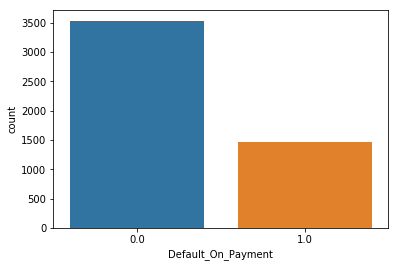

In [15]:
# Visualization of Default on Payment statistics
sns.countplot(x='Default_On_Payment',data=data)
plt.show()

In [16]:
# Checking how other numerical attributes mean differs based on Status_Checking_Acc value 
data.groupby('Status_Checking_Acc').mean()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
Status_Checking_Acc,,,,,,,,
A11,21.339033,3194.501859,3.064684,3.018587,35.350929,1.373978,1.188848,0.483271
A12,22.716995,3824.763278,2.895296,2.768589,34.032625,1.350531,1.114568,0.376328
A13,17.371711,2184.766447,2.792763,2.588816,36.865132,1.309211,1.141447,0.220395
A14,19.921713,3126.600197,3.021172,2.860660,36.403742,1.462826,1.156573,0.123584


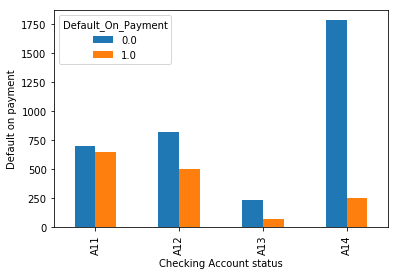

In [17]:
# Checking how Checking Account status affects on Default_On_Payment 
pd.crosstab(data.Status_Checking_Acc,data.Default_On_Payment).plot(kind='bar')
# plt.title()
plt.xlabel('Checking Account status')
plt.ylabel('Default on payment')

In [18]:
# Checking how other numerical attributes mean differs based on different Credit_History
data.groupby('Credit_History').mean()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
Credit_History,,,,,,,,
A30,27.718593,5262.919598,2.683417,2.904523,34.351759,1.708543,1.170854,0.613065
A31,22.634855,3341.157676,3.141079,3.004149,36.273859,1.165975,1.269710,0.556017
A32,20.149198,3052.783663,2.968295,2.777695,33.852667,1.118239,1.126818,0.309586
A33,26.066975,4245.759815,2.916859,2.794457,36.133949,1.651270,1.203233,0.307159
A34,19.463989,3100.048476,3.054709,3.010388,38.477839,1.844183,1.165512,0.169668


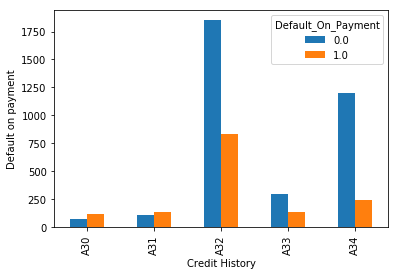

In [19]:
# Checking how Credit History affects on Default_On_Payment 
pd.crosstab(data.Credit_History,data.Default_On_Payment).plot(kind='bar')
# plt.title()
plt.xlabel('Credit History')
plt.ylabel('Default on payment')

In [20]:
# Checking how other numerical attributes mean differs based on different Property Value
data.groupby('Property').mean()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
Property,,,,,,,,
A121,16.291577,2177.030958,2.927286,2.709863,35.732901,1.401728,1.163427,0.203744
A122,19.656442,3110.776512,2.943032,2.816827,34.971954,1.396144,1.149869,0.303243
A123,22.752776,3553.220339,3.011105,2.800117,33.337814,1.409117,1.117475,0.298071
A124,26.944518,4886.505945,3.100396,3.351387,40.908851,1.381770,1.220608,0.429326


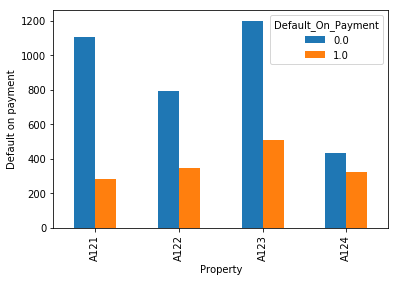

In [21]:
# Checking how different Property value affects on Default_On_Payment 
pd.crosstab(data.Property,data.Default_On_Payment).plot(kind='bar')
#Plot ( Title)
plt.xlabel('Property')
plt.ylabel('Default on payment')

In [22]:
# Checking how other numerical attributes mean differs based on different 'Foreign_Worker' Value
data.groupby('Foreign_Worker').mean()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
Foreign_Worker,,,,,,,,
A201,21.207183,3298.031970,3.004982,2.873573,35.547021,1.401287,1.148017,0.299979
A202,12.314917,2570.812155,2.475138,2.563536,34.889503,1.364641,1.292818,0.104972


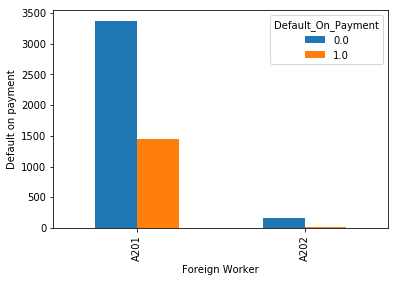

In [23]:
# Checking how different 'Property' value affects on 'Default_On_Payment' 
pd.crosstab(data.Foreign_Worker,data.Default_On_Payment).plot(kind='bar')
# Plot(Title)
plt.xlabel('Foreign Worker')
plt.ylabel('Default on payment')

## Visualisation of numerical variables

In [24]:
#  Statistical distribution of 'Age' vs 'Default_On_Payment'
pd.DataFrame(data[['Age','Default_On_Payment']]).groupby('Default_On_Payment').describe()

Age                                                    
                     count       mean        std   min   25%   50%   75%   max
Default_On_Payment                                                            
0.0                 3534.0  36.138936  11.266310  19.0  27.0  34.0  42.0  75.0
1.0                 1464.0  34.036885  11.129758  19.0  25.0  31.0  40.0  74.0

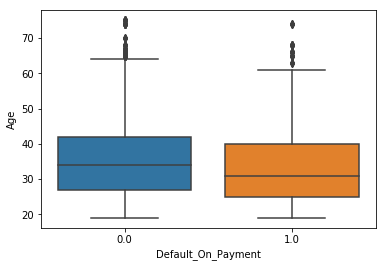

In [25]:
# Visualization on how Statistical distribution of 'Age' affects 'Default_On_Payment' value
sns.boxplot(x=data['Default_On_Payment'],y=data["Age"])

In [26]:
#  Statistical distribution of 'Credit_Amount' vs 'Default_On_Payment'
pd.DataFrame(data[['Credit_Amount','Default_On_Payment']]).groupby('Default_On_Payment').describe()

Credit_Amount                                            \
                           count         mean          std    min      25%   
Default_On_Payment                                                           
0.0                       3534.0  2994.297680  2388.045728  250.0  1378.25   
1.0                       1464.0  3941.317623  3523.717224  433.0  1358.00   

                                             
                       50%     75%      max  
Default_On_Payment                           
0.0                 2279.0  3622.0  15857.0  
1.0                 2600.0  5096.0  18424.0

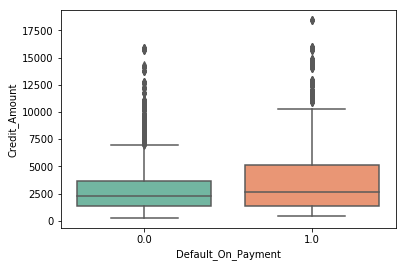

In [27]:
# Visualization on how Statistical distribution of 'Age' affects 'Default_On_Payment' value
sns.boxplot(x=data['Default_On_Payment'],y=data["Credit_Amount"], palette="Set2")

## Create Dummy Variables

In [29]:
# Creating a set of Dummy variables for Categorical Attributes.
# This dummy variables will have only boolean variables 0 or 1.

# List of Categorical Variables
cat_vars=['Status_Checking_Acc','Credit_History','Purposre_Credit_Taken','Savings_Acc','Years_At_Present_Employment',
          'Marital_Status_Gender','Other_Debtors_Guarantors','Property','Other_Inst_Plans ','Housing','Job','Telephone',
          'Foreign_Worker']
data_new = data

# Loop on the above list in order to make a new dataset containing categorical Dummy variables
for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    d=data_new.join(cat_list)
    data_new=d
    del data_new[var]
    

In [30]:
data_new.head(20)

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment,Status_Checking_Acc_A11,Status_Checking_Acc_A12,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_Worker_A201,Foreign_Worker_A202
0,6,1169,4.0,4.0,67,2.0,1.0,0.0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2.0,2.0,22,1.0,1.0,0.0,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2.0,3.0,49,1.0,2.0,0.0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2.0,4.0,45,1.0,2.0,0.0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3.0,4.0,53,1.0,2.0,1.0,1,0,...,0,1,0,0,1,0,1,0,1,0
5,36,9055,2.0,4.0,35,1.0,2.0,0.0,0,0,...,0,1,0,1,0,0,0,1,1,0
6,24,2835,3.0,4.0,53,1.0,1.0,0.0,0,0,...,1,0,0,0,1,0,1,0,1,0
7,36,6948,2.0,2.0,35,1.0,1.0,0.0,0,1,...,0,0,0,0,0,1,0,1,1,0
8,12,3059,2.0,4.0,61,1.0,1.0,0.0,0,0,...,1,0,0,1,0,0,1,0,1,0
9,30,5234,4.0,2.0,28,2.0,1.0,1.0,0,1,...,1,0,0,0,0,1,1,0,1,0


In [31]:
# Assign Attributes for dependant(y) and independant(X) variable list
data_final_vars=data_new.columns.values.tolist()
print(data_final_vars)
y=['Default_On_Payment'] # Dependant variable
X=[i for i in data_final_vars if i not in y] # Independant variables

['Duration_in_Months', 'Credit_Amount', 'Inst_Rt_Income', 'Current_Address_Yrs', 'Age', 'Num_CC', 'Dependents', 'Default_On_Payment', 'Status_Checking_Acc_A11', 'Status_Checking_Acc_A12', 'Status_Checking_Acc_A13', 'Status_Checking_Acc_A14', 'Credit_History_A30', 'Credit_History_A31', 'Credit_History_A32', 'Credit_History_A33', 'Credit_History_A34', 'Purposre_Credit_Taken_A40', 'Purposre_Credit_Taken_A41', 'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42', 'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A44', 'Purposre_Credit_Taken_A45', 'Purposre_Credit_Taken_A46', 'Purposre_Credit_Taken_A48', 'Purposre_Credit_Taken_A49', 'Savings_Acc_A61', 'Savings_Acc_A62', 'Savings_Acc_A63', 'Savings_Acc_A64', 'Savings_Acc_A65', 'Years_At_Present_Employment_A71', 'Years_At_Present_Employment_A72', 'Years_At_Present_Employment_A73', 'Years_At_Present_Employment_A74', 'Years_At_Present_Employment_A75', 'Marital_Status_Gender_A91', 'Marital_Status_Gender_A92', 'Marital_Status_Gender_A93', 

## Feature Selection Method - RFE (Recursive Feature Elimination)

### Recursive feature elimination (RFE):-
Recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [32]:
from sklearn import datasets
from sklearn.feature_selection import RFE
# Deploying Model
logreg = LogisticRegression()
# Backward Selection for RFE Algorithm  foe Target-20 Variables
rfe = RFE(logreg, 20)
# Fit in the algorithm
rfe = rfe.fit(data_new[X], data_new[y])
# Print the Bolean Selection
# We will consider for True Values
print(rfe.support_)
# Print Ranking - If ranking is 1 means selected, other values doesnt carry much weight
# We will consider for True Values
print(rfe.ranking_)

C:\Users\Monir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False  True  True  True
  True False False  True  True  True False False False False False  True
  True False  True  True False False False False False False  True False
 False False False False False  True  True  True False False  True False
 False  True False  True  True False False False False False False False
  True]
[37 42 15 38 39 21 24  3 10  1  1  1  1 13 12  1  1  1  5  9  8 32 27  1  1
 40  1  1 25  4 23 33 28 34  1 11 14 29  6 22 30  1  1  1 19 20  1 41 35  1
 16  1  1  7 26 36 31 18 17  2  1]


In [33]:
# Selection of Variables based on Ranking=1
x = data_new[X].columns.values[np.where(rfe.ranking_==1)].tolist()
# Modified Data set after selection
X = data_new[x]
y = data_new['Default_On_Payment']

## Modeling ( Logistic Regression )

### Brief Model Description:-
Logistic Regression is a regression model where the dependent variable (DV) is categorical where  the output can take only two values, "0" and "1", which represent no default and default respectively. During this modeling, we implement the "model.fit()" function and later on splits the dataset into two subsets which is training and test.

In [34]:
import statsmodels.api as sm
from pandas.core import datetools
# Output from statsmodels
logit_model=sm.Logit(y,X)
# Fit the Model.
result=logit_model.fit()
# Print summary after deploying 'Logistic Regression'
print(result.summary())

C:\Users\Monir\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.483373
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 4998
Model:                          Logit   Df Residuals:                     4978
Method:                           MLE   Df Model:                           19
Date:                Mon, 11 Dec 2017   Pseudo R-squ.:                  0.2007
Time:                        23:40:53   Log-Likelihood:                -2415.9
converged:                       True   LL-Null:                       -3022.5
                                        LLR p-value:                1.375e-245
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Status_Checking_Acc_A13            -1.0227      0.152     -6.725  

In [35]:
# Print the confidence interval
print(result.conf_int())

                                        0         1
Status_Checking_Acc_A13         -1.320711 -0.724643
Status_Checking_Acc_A14         -1.588317 -1.267579
Credit_History_A30               0.626912  1.282187
Credit_History_A31               0.445798  1.073245
Credit_History_A34              -0.879822 -0.530777
Purposre_Credit_Taken_A40        0.475210  0.805963
Purposre_Credit_Taken_A41       -0.990762 -0.423681
Purposre_Credit_Taken_A46        0.363804  0.979900
Purposre_Credit_Taken_A48       -2.910978 -0.682148
Savings_Acc_A61                  0.746597  1.064523
Savings_Acc_A62                  0.262299  0.764164
Years_At_Present_Employment_A74 -0.727715 -0.325659
Other_Debtors_Guarantors_A102    0.125714  0.797022
Other_Debtors_Guarantors_A103   -1.283934 -0.587536
Property_A121                   -0.659762 -0.319077
Property_A124                    0.338080  0.914087
Other_Inst_Plans _A143          -0.643517 -0.346591
Housing_A152                    -0.707644 -0.403351
Housing_A153

In [36]:
# Divide Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn import metrics
# Implement Logistic Regression Model by providing Training sets.
logreg = LogisticRegression()
# Fit in the Model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Accuracy of Modeling

In [37]:
#In this phase, we uses logreg.predict() function in order to get the accuracy value on the modelin that we useed.
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


## Validation

In [38]:
# Import Validation Library
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#In order to validate the modeling, we uses cross_val_score. Then from that we develop the confusion matrix.

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()

scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.762


In [39]:
# Import Confusion Matrix Package
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix
print(confusion_matrix)

[[985  98]
 [263 154]]


In [40]:
# Import Classification Report
from sklearn.metrics import classification_report
# Present validation Report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.79      0.91      0.85      1083
        1.0       0.61      0.37      0.46       417

avg / total       0.74      0.76      0.74      1500

